## Импорт необходимых библиотек

In [165]:
from matplotlib import pyplot as plt
from toolbox import *

В дальнейшем функции, представленные ниже, будут добавлены в отдельный toolbox.

In [166]:
def plot_spectrogram(signal, window_name: str, window_offset_step: int, window_opt_len=8):
    """
    Функция позволяет построить спектрограмму сигнала при различных параметрах окна.

    Parametrs
    ---------
    signal : array_like
             Отсчеты сигнала во временной области.
    window_name : 'Прямоугольное окно', 'окно Хэмминга'
             Название применяемого при построении спектрограммы окна.
    window_offset_step : int
             Шаг смещения окна (задается в отсчетах).
    window_opt_len : int, default: 8
             Ширина окна (задается в отсчетах).

    Returns
    -------
    Функция создает график и ничего не возвращает.

    Raises
    ------
    ValueError
        Если в функцию было передано неверное название окна или размерность шага смещения окна.
    """
    if window_name == 'Прямоугольное окно':
        window = np.ones(window_opt_len)
    elif window_name == 'Окно Хэмминга':
        window = np.hamming(window_opt_len)
    else:
        raise ValueError("Ошибка ввода. Некорректное название применяемого окна " +
                         "(допускается: 'Прямоугольное окно' или 'Окно Хэмминга')!")

    noverlap = window_opt_len - window_offset_step # количество перекрывающихся точек соседних окон
    if noverlap < 0:
        raise ValueError("Ошибка ввода. Ширина окна (window_opt_len) должна быть " + 
                         "меньше шага смещения окна (window_offset_step)!")

    plt.figure()
    plt.subplot(211)
    plt.title(window_name + ' с размером (в отсчетах), равным ' + str(window_opt_len) + '.' +
              '\nШаг смещения окна (в отсчетах) равен ' + str(window_offset_step) + '.')
    # Функция построения спектрограммы
    plt.specgram(signal, 
                 NFFT=window_opt_len,  # количество точек, используемых для вычисления БПФ
                 window=window,  # оконная функция, применяемая к каждому сегменту сигнала перед выполнением БПФ
                 noverlap=noverlap) # количество точек перекрытия между соседними окнами
    plt.xlabel('Sample')
    plt.ylabel('Normalized Frequency')
    plt.show()

In [167]:
def plot_scalogramm(signal, t_d: float):
    """
    Функция позволяет построить скейлограмму сигнала.

    Parametrs
    ---------
    signal : array_like
          Отсчеты сигнала во временной области.
    t_d : float
          Период дискритизации сигнала, с.

    Returns
    -------
    Функция создает график и ничего не возвращает.
    """
    # Функция вычисления непрерывного вейвлет-преобразования
    # cwtmatr - матрица вейвлет-коэффициентов, полученная в результате преобразования
    cwtmatr, _ = pywt.cwt(signal,  # сигнал, который хотим преобразовать
                              np.arange(1,128),  # массив масштабов, используемый для преобразования
                              'morl',  # тип вейвлета, используемый для преобразования (вейвлет Морле)
                              sampling_period=t_d)  # период дискретизации
    plt.figure()
    plt.title('Скейлограмма')
    plt.imshow(cwtmatr,  # матрица вейвлет-коэффициентов, полученная в результате преобразования
               extent=[-0, len(signal), 1, 128],  # границы осей для отображаемого изображения
               aspect='auto',  # управление соотношением сторон изображения
               vmax=abs(cwtmatr).max(),  # максимальное значение для нормализации
               vmin=-abs(cwtmatr).max())  # минимальное значение для нормализации
    plt.tight_layout() # автоматическая настройка отступов  
    plt.show()

## Анализ сигнала с использованием спектрограмм и вейвлет-разложения

**Исходные параметры**

Частота дискретизации, ${f_d}$ - F_D;

Период дискретизации, ${t_d}$ - T_D;

Длительность импульса, ${t_{imp}}$ - T_IMPULSE;

Длительность рассматриваемого интервала, ${T}$ - T_WINDOW;

Частота несущей, ${f_{carr}}$ - F_CARRIER;

Частота модуляции, ${f_{mod}}$ - F_MOD;

Глубина модуляции, ${i}$ - I_MOD;

Количество импульсов - N_CHIPS.

Размер окна для построения спектрограммы - WINDOW_OPT_LEN

In [168]:
F_D = 10e6               # частота дискретизации, Гц
T_D = 1/F_D             # период дискретизации, с
T_IMPULSE = 40e-6       # длительность импульса, с
T_WINDOW = 80e-6        # длительность рассматриваемого интервала, с
F_CARRIER = 0.80e6      # частота несущей, Гц
F_MOD = 0.6e6           # частота модуляции, Гц
I_MOD = 0.8             # глубина модуляции
N_CHIPS = 8             # количество импульсов
WINDOW_OPT_LEN = 320    # размер окна для построения спектрограммы

### 1. ЛЧМ импульсы

**Формирование последовательности отсчетов**

In [169]:
s_c = generate_sequence('chirp', T_D, N_CHIPS, T_IMPULSE, F_CARRIER);   # ЛЧМ импульсы

**Отображение сигнала во временной области**

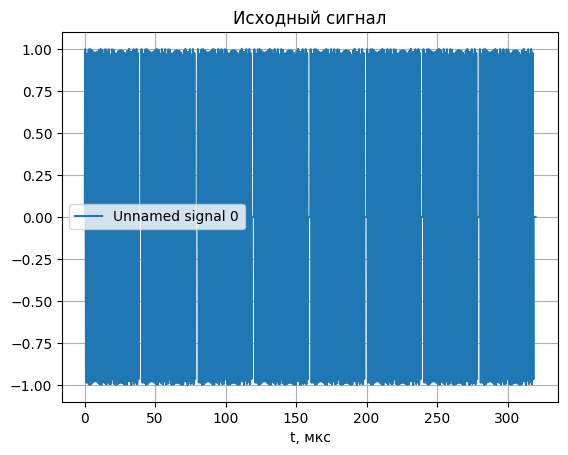

In [170]:
plot_signal([[T_D, s_c]])  # построение сигнала

**Анализ спектрограмм**

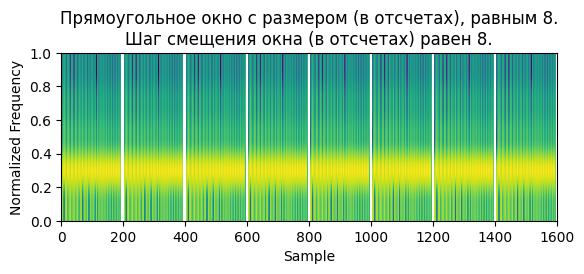

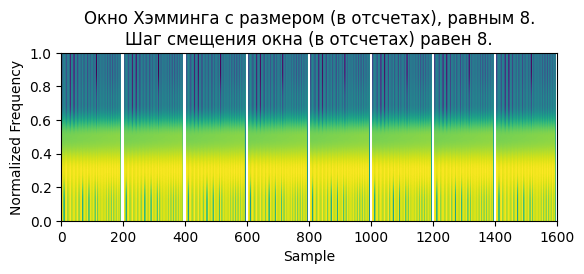

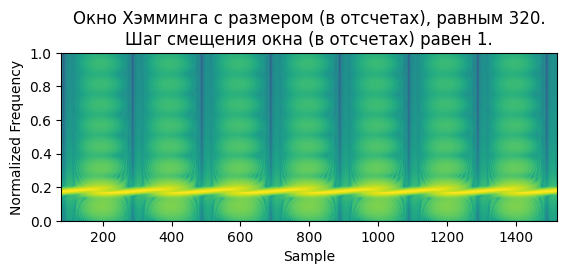

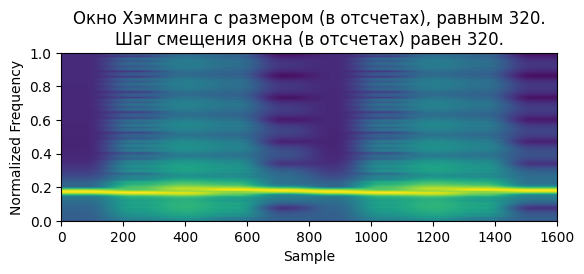

In [171]:
# Построение спектрограммы с помощью прямоугольного окна малого размера с шагом в ширину окна
plot_spectrogram(s_c, window_name='Прямоугольное окно', window_offset_step=8)
# Построение спектрограммы с помощью окна Хэмминга малого размера с шагом в ширину окна
plot_spectrogram(s_c, window_name='Окно Хэмминга', window_offset_step=8)
# Построение спектрограммы с помощью окна Хэмминга большого размера с шагом в один отсчет
plot_spectrogram(s_c, window_name='Окно Хэмминга', window_offset_step=1, window_opt_len=WINDOW_OPT_LEN)
# Построение спектрограммы с помощью окна Хэмминга большого размера с шагом в ширину окна
plot_spectrogram(s_c, window_name='Окно Хэмминга', window_offset_step=WINDOW_OPT_LEN, window_opt_len=WINDOW_OPT_LEN)

**Анализ карт коэффициентов вейвлет-преобразования (скейлограмм)**

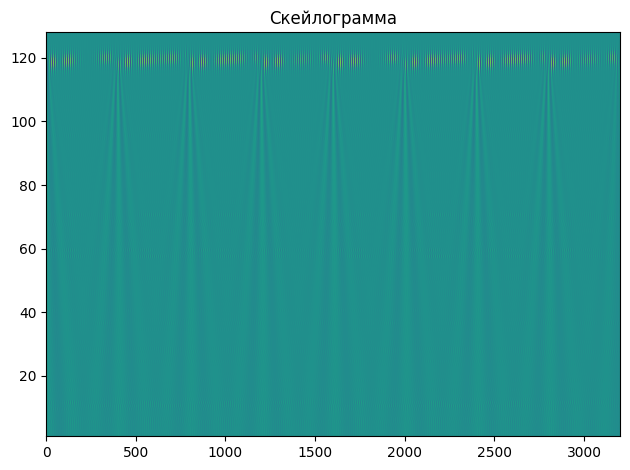

In [172]:
# Построение скейлограммы для ЛЧМ импульсов
plot_scalogramm(s_c, T_D)

### 2. Радиоимпульсы с псевдослучайной перестройкой частоты

**Формирование последовательности отсчетов**

In [173]:
s_r = generate_sequence('radio', T_D, N_CHIPS, T_IMPULSE, F_CARRIER);   # р/импульс

**Отображение сигнала во временной области**

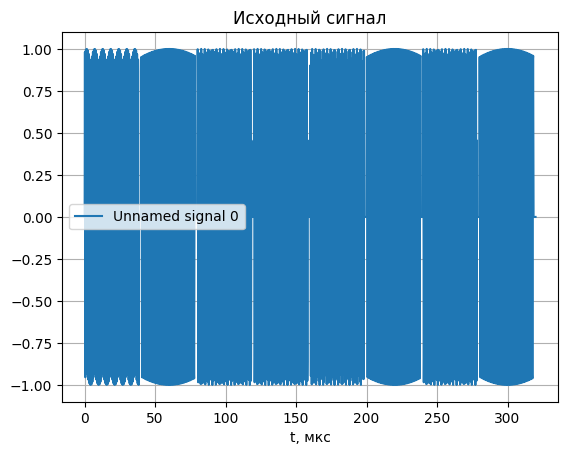

In [174]:
plot_signal([[T_D, s_r]])  # построение сигнала

**Анализ спектрограмм**

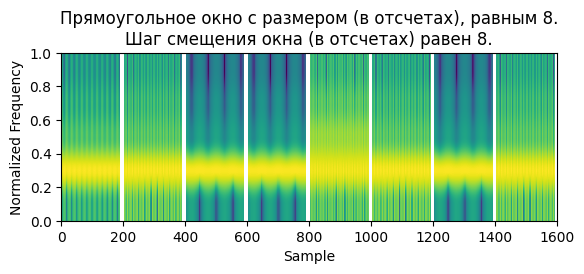

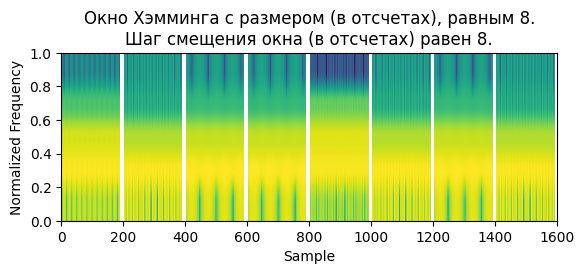

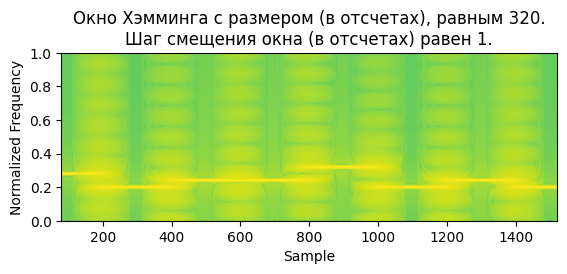

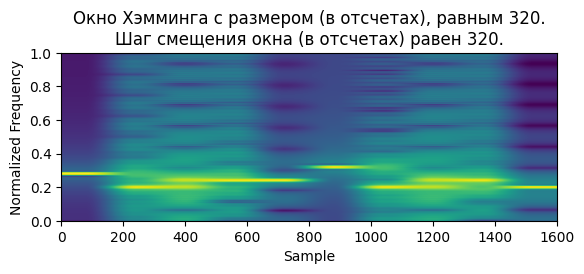

In [175]:
# Построение спектрограммы с помощью прямоугольного окна малого размера с шагом в ширину окна
plot_spectrogram(s_r, window_name='Прямоугольное окно', window_offset_step=8)
# Построение спектрограммы с помощью окна Хэмминга малого размера с шагом в ширину окна
plot_spectrogram(s_r, window_name='Окно Хэмминга', window_offset_step=8)
# Построение спектрограммы с помощью окна Хэмминга большого размера с шагом в один отсчет
plot_spectrogram(s_r, window_name='Окно Хэмминга', window_offset_step=1, window_opt_len=WINDOW_OPT_LEN)
# Построение спектрограммы с помощью окна Хэмминга большого размера с шагом в ширину окна
plot_spectrogram(s_r, window_name='Окно Хэмминга', window_offset_step=WINDOW_OPT_LEN, window_opt_len=WINDOW_OPT_LEN)

**Анализ карт коэффициентов вейвлет-преобразования (скейлограмм)**

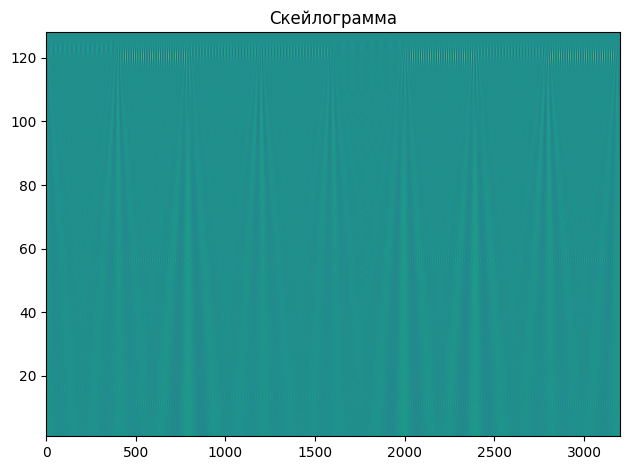

In [176]:
# Построение скейлограммы для радиоимпульсов с псевдослучайной перестройкой частоты
plot_scalogramm(s_r, T_D)

### 3. Амплитудно-модулированный сигнал

**Формирование последовательности отсчетов**

In [177]:
s_am = generate_sequence('AM', T_D, N_CHIPS, T_IMPULSE, F_CARRIER);     # АМ сигнал

**Отображение сигнала во временной области**

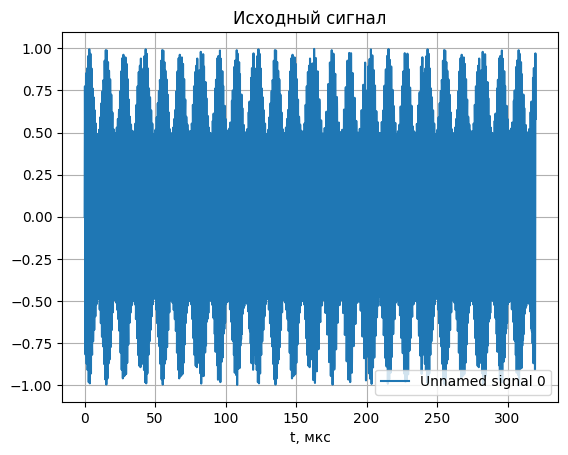

In [178]:
plot_signal([[T_D, s_am]])  # построение сигнала

**Анализ спектрограмм**

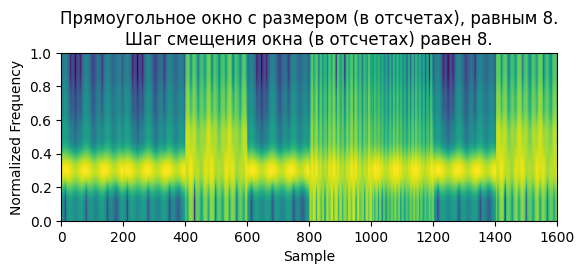

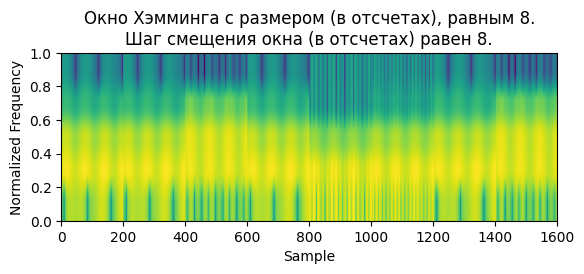

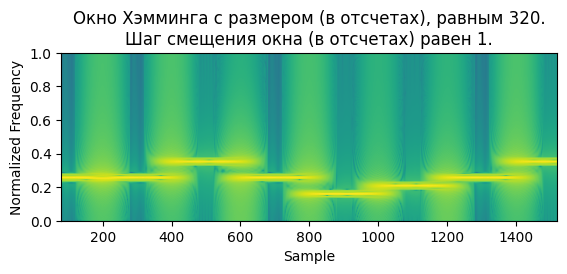

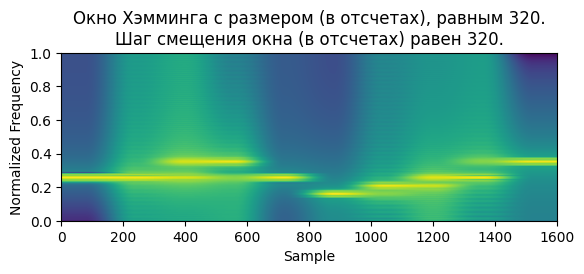

In [179]:
# Построение спектрограммы с помощью прямоугольного окна малого размера с шагом в ширину окна
plot_spectrogram(s_am, window_name='Прямоугольное окно', window_offset_step=8)
# Построение спектрограммы с помощью окна Хэмминга малого размера с шагом в ширину окна
plot_spectrogram(s_am, window_name='Окно Хэмминга', window_offset_step=8)
# Построение спектрограммы с помощью окна Хэмминга большого размера с шагом в один отсчет
plot_spectrogram(s_am, window_name='Окно Хэмминга', window_offset_step=1, window_opt_len=WINDOW_OPT_LEN)
# Построение спектрограммы с помощью окна Хэмминга большого размера с шагом в ширину окна
plot_spectrogram(s_am, window_name='Окно Хэмминга', window_offset_step=WINDOW_OPT_LEN, window_opt_len=WINDOW_OPT_LEN)

**Анализ карт коэффициентов вейвлет-преобразования (скейлограмм)**

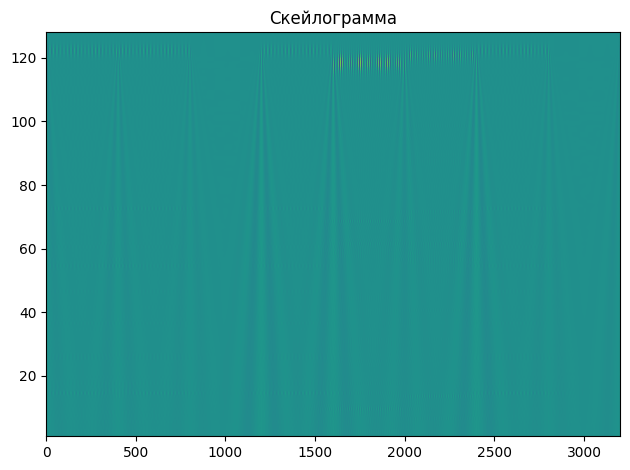

In [180]:
# Построение скейлограммы для АМ сигнала
plot_scalogramm(s_am, T_D)